In [ ]:
'''Springbok Analysis by Liyanda'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SA Rugby data analysis/RugbyResults.csv")
df['date'] = pd.to_datetime(df['date'])

print(df.head())

        date home_team away_team  home_score  away_score  \
0 1871-03-27  Scotland   England           1           0   
1 1872-02-05   England  Scotland           2           1   
2 1873-03-03  Scotland   England           0           0   
3 1874-02-23   England  Scotland           1           0   
4 1875-02-15   England   Ireland           2           0   

                                competition                stadium       city  \
0     1871 Scotland v England International          Raeburn Place  Edinburgh   
1        1871–72 Home Nations International               The Oval     London   
2        1872–73 Home Nations International  West of Scotland F.C.    Glasgow   
3        1873–74 Home Nations International               The Oval     London   
4  1874–75 Home Nations rugby union matches               The Oval     London   

    country  neutral  world_cup  
0  Scotland    False      False  
1   England    False      False  
2  Scotland    False      False  
3   England    F

In [ ]:
springboks = df[
    (df['home_team'] == 'South Africa') | (df['away_team'] == 'South Africa')
].copy()

springboks['opponent'] = springboks.apply(
    lambda r: r['away_team'] if r['home_team'] == 'South Africa' else r['home_team'], axis=1)

springboks['SA_score'] = springboks.apply(
    lambda r: r['home_score'] if r['home_team'] == 'South Africa' else r['away_score'], axis=1)

springboks['opp_score'] = springboks.apply(
    lambda r: r['away_score'] if r['home_team'] == 'South Africa' else r['home_score'], axis=1)

springboks['result'] = springboks.apply(
    lambda r: 'Win' if r['SA_score'] > r['opp_score']
    else 'Loss' if r['SA_score'] < r['opp_score']
    else 'Draw', axis=1)


In [7]:
total = springboks.shape[0]
wins = (springboks['result'] == 'Win').sum()
losses = (springboks['result'] == 'Loss').sum()
draws = (springboks['result'] == 'Draw').sum()
avg_scored = springboks['SA_score'].mean()
avg_conceded = springboks['opp_score'].mean()

print("📈 Springbok Historical Performance")
print(f"Matches: {total} | Wins: {wins}, Losses: {losses}, Draws: {draws}")
print(f"Avg Points Scored: {avg_scored:.1f}, Avg Points Conceded: {avg_conceded:.1f}")


📈 Springbok Historical Performance
Matches: 446 | Wins: 271, Losses: 157, Draws: 18
Avg Points Scored: 22.6, Avg Points Conceded: 17.3


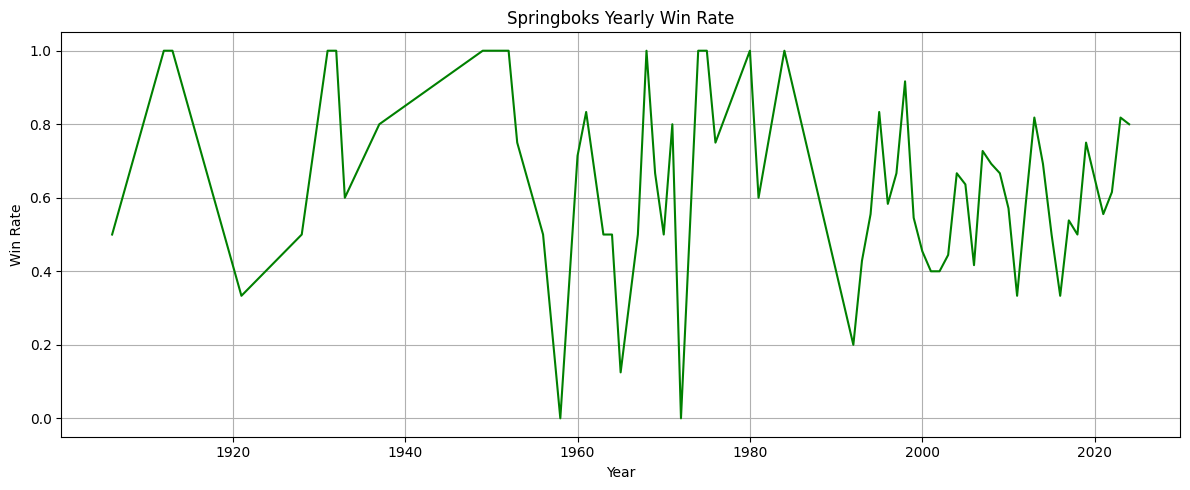

In [ ]:
springboks['year'] = springboks['date'].dt.year

yearly_summary = springboks.groupby('year')['result'].value_counts().unstack().fillna(0)
yearly_summary['Total'] = yearly_summary.sum(axis=1)
yearly_summary['Win Rate'] = yearly_summary['Win'] / yearly_summary['Total']

plt.figure(figsize=(12, 5))
plt.plot(yearly_summary.index, yearly_summary['Win Rate'], color='green')
plt.title("Springboks Yearly Win Rate")
plt.ylabel("Win Rate")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


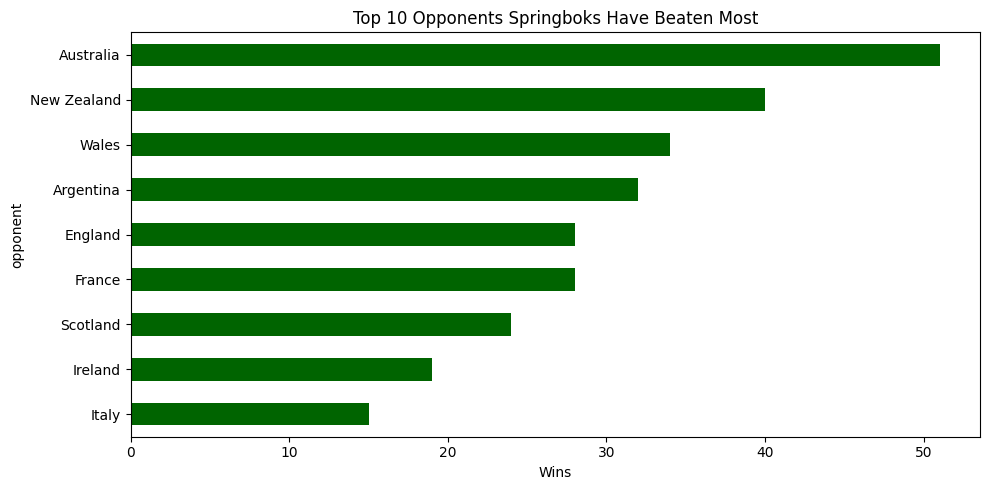

In [11]:
opponent_wins = springboks[springboks['result'] == 'Win']['opponent'].value_counts().head(10)

plt.figure(figsize=(10, 5))
opponent_wins.plot(kind='barh', color='darkgreen')
plt.title("Top 10 Opponents Springboks Have Beaten Most")
plt.xlabel("Wins")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

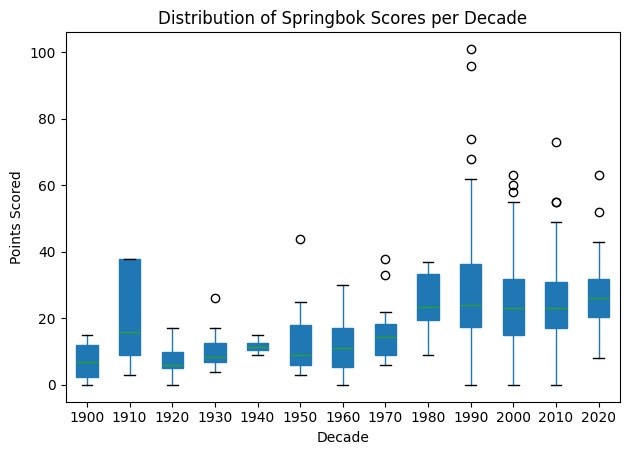

In [ ]:
springboks['decade'] = (springboks['year'] // 10) * 10

# Boxplot
plt.figure(figsize=(12, 5))
springboks.boxplot(column='SA_score', by='decade', grid=False, patch_artist=True)
plt.title("Distribution of Springbok Scores per Decade")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Decade")
plt.ylabel("Points Scored")
plt.tight_layout()
plt.show()
